In [1]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
#Load csv file into Pandas DataFrame
h_data = pd.read_csv("Resource/Health_insurance.csv")

#View DataFrame
h_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Check if DataFrame contains any null values
h_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#Check attributes
h_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

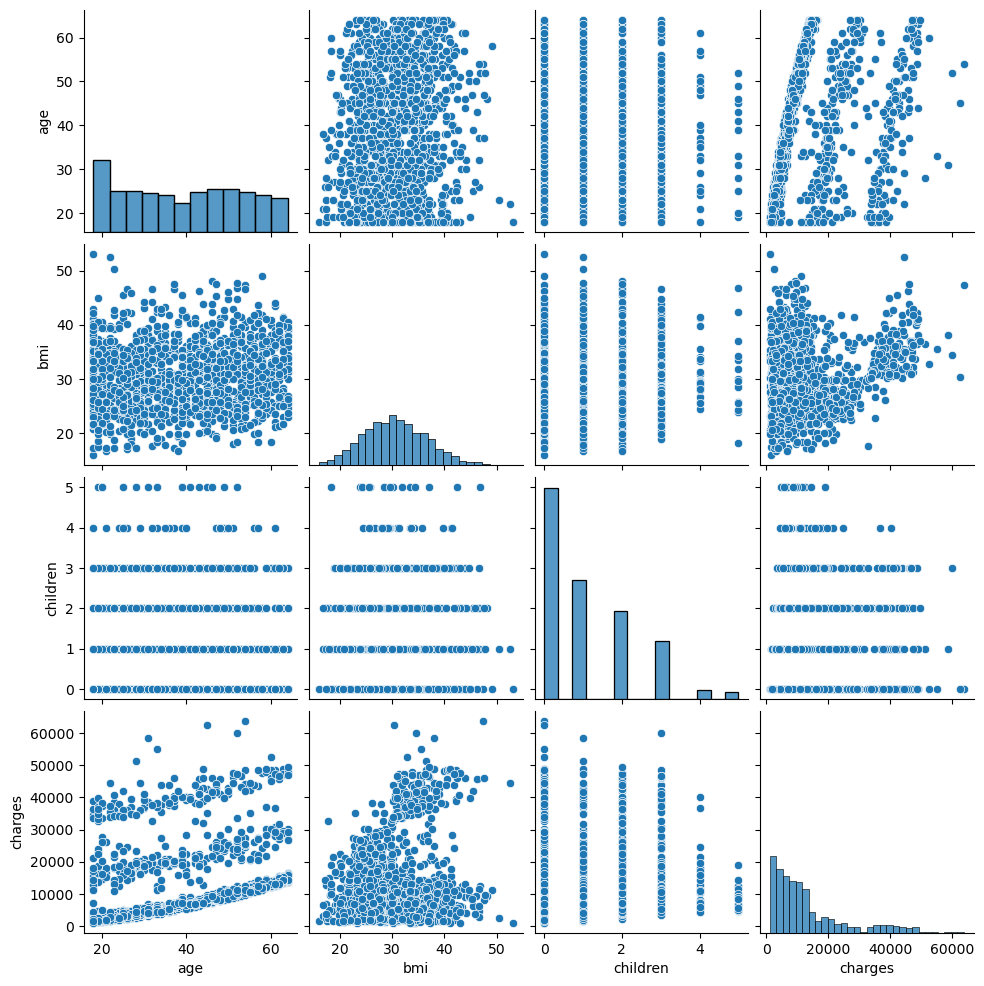

In [5]:
#Visualize the data using scatter matrix
sns.pairplot(h_data)
plt.show()

In [6]:
#Encode Categorical attributes
#Sex Encoded: Male:1, Female:0
#Smoker Encoded: Yes:1, No:0
#Change the 'male' and 'female' to numerical data in the 'sex' column 
h_data['sex'] = h_data['sex'].map({'female': 0, 'male': 1})

#Change the 'yes' and 'no' values to numerical data in the 'smoker' column
h_data['smoker'] = h_data['smoker'].map({'no': 0, 'yes': 1})

print(h_data.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [10]:
#Region will be transformed into 4 columns - southwest, southeast, northwest, northeast
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[5])], remainder="passthrough")
datavalues = columnTransformer.fit_transform(h_data)



In [11]:
#Splitting the dependent and independent variables
X = datavalues[:, :-1]
y = datavalues[:, -1]

print(X.shape)
print(y.shape)

(1338, 9)
(1338,)


In [12]:
#split data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=11)

In [13]:
print(X_train.shape)
print(X_test.shape)

(1003, 9)
(335, 9)


In [14]:
#Scale the data
print(h_data.var())

age         1.974014e+02
sex         2.501596e-01
bmi         3.718788e+01
children    1.453213e+00
smoker      1.629689e-01
charges     1.466524e+08
dtype: float64


C:\Users\Martha\AppData\Local\Temp\ipykernel_11600\1899585217.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(h_data.var())


In [15]:
from sklearn.preprocessing import StandardScaler
st_X = StandardScaler()
st_Y = StandardScaler()

In [16]:
X_train = st_X.fit_transform(X_train)
X_test = st_X.transform(X_test)

In [17]:
y_train = st_Y.fit_transform(y_train.reshape(-1,1))
y_test = st_Y.transform(y_test.reshape(-1,1))

In [18]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

c:\Users\Martha\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [19]:
y_pred = gbr.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.12486130316752736


In [23]:
print("R Squared Value:", r2_score(y_test, y_pred))

R Squared Value: 0.8672955386005966


In [24]:
#Compare actual with predicted values
compare = pd.DataFrame({"Actual": y_test[:,0], "Predicted": y_pred.reshape(-1,1)[:,0]})
compare.head()

,Actual,Predicted
0,1.888680,1.880189
1,-0.733918,-0.551531
2,-0.469525,-0.395612
3,-0.360760,-0.243868
4,-0.311786,-0.320893
